### Problem 1:


In [2]:
import numpy as np
import pandas as pd

In [3]:
s1 = pd.Series(np.repeat(-3, 5))
s1.index = np.arange(1,6)

s2 = pd.Series({'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26})

### Problem 2.

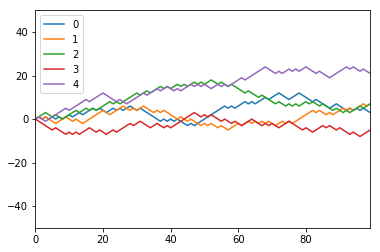

In [4]:
import matplotlib.pyplot as plt
N = 100
s = np.zeros((N, 5))
s[1:] = np.random.binomial(1, .5, size=(N-1,5))*2-1 


s = pd.DataFrame(s)
s = s.cumsum() 
s.plot()
plt.ylim([-50, 50])
plt.show()
plt.close()

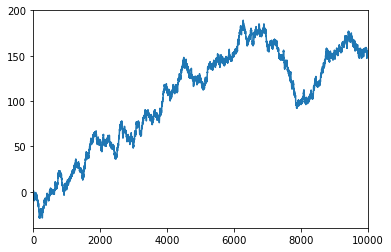

In [5]:
N = 10000
s = np.zeros((N, ))
s[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1 
s = pd.Series(s)
s = s.cumsum() 
s.plot()
plt.show()
plt.close()

### Problem 3.

In [6]:
#build toy data for SQL operations
>>> name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt',
            'Alexander', 'JeanMarie']
>>> sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
>>> age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
>>> rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
>>> ID = range(9)
>>> aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
>>> GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
>>> mathID = [0, 1, 5, 6, 3]
>>> mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
>>> major = ['y', 'n', 'y', 'n', 'n']
>>> studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex,
                                'Age': age, 'Class': rank})
>>> otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
>>> mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [7]:
studentInfo[(studentInfo['Age']> 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


In [8]:
pd.merge(studentInfo[studentInfo.Sex == 'M'], otherInfo, on='ID')[['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


### Problem 5.

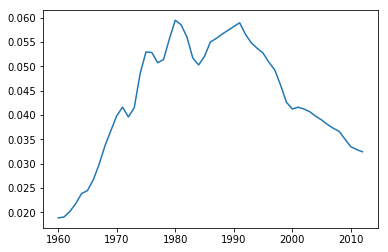

In [9]:
crime = pd.read_csv(r'crime_data.txt', skiprows=1, index_col=0)
crime['Crime_Rate'] = crime.Total / crime.Population

plt.plot(crime.Crime_Rate)
plt.show()
plt.close()

In [10]:
crime.sort_values('Crime_Rate', ascending=False).Crime_Rate[:5]

Year
1980    0.059500
1991    0.058978
1981    0.058582
1990    0.058203
1989    0.057410
Name: Crime_Rate, dtype: float64

In [11]:
av = crime.mean()[['Total', 'Burglary']]

In [12]:
crime[(crime.Total < av.Total) & (crime.Burglary > av.Burglary)].index

Int64Index([1973, 1974], dtype='int64', name='Year')

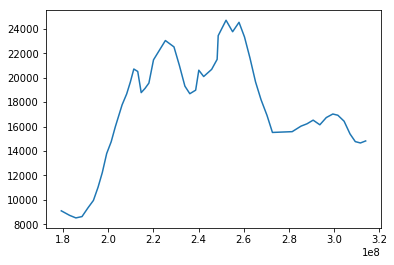

In [19]:
plt.plot(crime.Population, crime.Murder)
plt.show()
plt.close()

In [30]:
crime_subset = crime[crime.index < 1990][['Population', 'Violent', 'Robbery']]
crime_subset.to_csv('crime_subset.txt')